In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['PROJ_LIB'] = r'C:/Users/mastr/miniconda3/pkgs/proj4-5.2.0-ha925a31_1/Library/share'
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [5]:
#### ======== Set the paths ========####

# Path for files
data_path = 'C:/Users/mastr/Documents/LSCE/'                         ## WINDOWS

# Path for the output files (images, etc)
out_path = "C:/Users/mastr/LSCE/RESULTS"

In [6]:
file = "TCRE_1pctCO2cdr.xlsx"
df = pd.read_excel(os.path.join(data_path+file),sheet_name='TCRE')
df

,year,co2,FF,DeltaCO2ATM GtC (CDIAC),ACCESS-ESM1-5_1pctCO2,CNRM-ESM2-1_1pctCO2,CanESM5_1pctCO2,UKESM1-0-LL_1pctCO2,MIROC-ES2L_1pctCO2,NorESM2-LM_1pctCO2,...,tas_CanESM5_1pctCO2.1,tas_UKESM1-0-LL_1pctCO2.1,tas_MIROC-ES2L_1pctCO2.1,tas_NorESM2-LM_1pctCO2.1,tas_CESM2_1pctCO2.1,tas_ACCESS-ESM1-5_1pctCO2-cdr,tas_CNRM-ESM2-1_1pctCO2-cdr,tas_CanESM5_1pctCO2-cdr,tas_UKESM1-0-LL_1pctCO2-cdr,tas_MIROC-ES2L_1pctCO2-cdr
0,1,284.316999,0.774706,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,286.634593,286.831280,288.155733,287.672457,287.109106,-0.040129,0.208495,0.189483,0.349750,0.007706
1,2,287.160169,0.782453,6.055952,2.934102,1.275698,2.568858,4.010300,-0.508193,1.536697,...,286.636703,286.843046,288.167552,287.658423,287.157594,0.001514,0.230336,0.191706,0.361566,0.019578
2,3,290.031770,0.790277,6.116512,5.917321,3.728860,5.403217,8.440327,1.808838,3.025636,...,286.637263,286.874971,288.191987,287.653683,287.178247,0.018392,0.241571,0.192377,0.393541,0.044076
3,4,292.932088,0.798180,6.177677,11.277865,6.078254,9.764249,11.667973,5.347856,6.036965,...,286.666332,286.905642,288.212891,287.644737,287.203720,0.058548,0.265340,0.221575,0.424253,0.065022
4,5,295.861409,0.806162,6.239454,15.767049,9.133881,13.332430,17.093174,8.789367,8.625860,...,286.693974,286.921548,288.211310,287.671819,287.257737,0.112384,0.306181,0.249321,0.440201,0.063491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,647,284.316999,0.000000,0.000000,883.240974,1448.743396,2569.772662,1168.874646,1614.239660,1652.494248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
647,648,284.316999,0.000000,0.000000,883.240974,1448.743396,2569.772662,1168.874646,1614.239660,1652.494248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,649,284.316999,0.000000,0.000000,883.240974,1448.743396,2569.772662,1168.874646,1614.239660,1652.494248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
649,650,284.316999,0.000000,0.000000,883.240974,1448.743396,2569.772662,1168.874646,1614.239660,1652.494248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


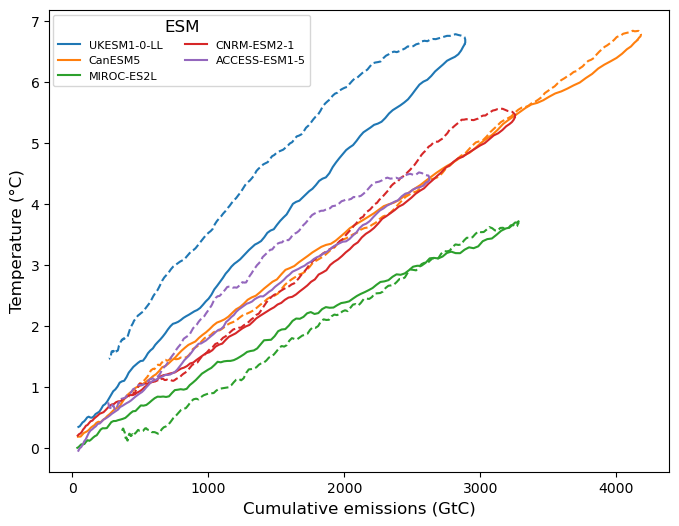

In [8]:
# Plot configuration
width_inch = 8
height_inch = 6

#title = 'ACC2 CO$_2$ Emissions Simulations - Carbon Budget at {}'.format(targetyear)

fig = plt.figure(figsize=(width_inch, height_inch))

title = 'TCRE, 1pctCO$_2$cdr'
xlabel = 'Cumulative emissions (GtC)'
ylabel = 'Temperature (°C)'

models = ['UKESM1-0-LL', 'CanESM5', 'MIROC-ES2L', 'CNRM-ESM2-1', 'ACCESS-ESM1-5' ]

ax = plt.subplot()
for x in models:
    color=next(ax._get_lines.prop_cycler)['color']
    max =  df[x+'_1pctCO2_1pctCO2-cdr'].idxmax()

    p1 = ax.plot(df[x+'_1pctCO2_1pctCO2-cdr'][:max+5].rolling(window=10).mean(),df['tas_' + x + '_1pctCO2_1pctCO2-cdr'][:max+5].rolling(window=10).mean(),
     color = color, linewidth=1.5)

    p2 = ax.plot(df[x+'_1pctCO2_1pctCO2-cdr'][max-5:].rolling(window=10).mean(),df['tas_' + x + '_1pctCO2_1pctCO2-cdr'][max-5:].rolling(window=10).mean(),
     color = color, label='_nolegend_', linestyle='--', linewidth=1.5)

ax.legend(models, title = "ESM", title_fontsize = 12,bbox_to_anchor=(0.43, 1),fontsize=8, ncol=2)

# ax.set_title(title, size = 14)
ax.set_xlabel(xlabel, size = 12)
ax.set_ylabel(ylabel, size = 12)

output_file = os.path.join(out_path,title) + ".png"
# plt.savefig(output_file, )
plt.show()
plt.close()
